## Project 2 - Data Analysis on Titanic's Passengers
##### Author: Nikolas Thorun

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the csv file to inside the variable
titanic_pd = pd.read_csv('D:/Udacity/P2/titanic_data.csv')

I will use the DataFrame because, when importing the data, the columns don't just come as 'string'; this facilitates the cleaning part, as I won't have to change the column types.

### Introduction
Before starting to explore the data, it is necessary to ask some questions. This way, the data can be analyzed in order to answer them. <br/>
* What is the average age of passengers? <br/>
* What is the average age of passengers by gender? <br/>
* What is the proportion between survivors and non-survivors? <br/>
* Is there a significant difference in the proportions of survivors between the genders? <br/>
* Is age a significant factor in the survival rate? <br/>
* Did first class passengers have the highest proportion of survivors? <br/>
The Titanic is known to have passed through three cities before leaving to New York: <br/>
* Is there a significant difference in city survival rates? <br/>
* Can we draw any conclusions about these cities, analyzing their passengers?<br/>
* Is there a relationship between age and ticket prices? That is, do older people have more money to buy more expensive tickets? <br/>
The answers will be given below.

In [3]:
# Counting the total number of passengers and passengers that have the 'age' field filled in
print(titanic_pd['PassengerId'].count())
print(titanic_pd['Age'].count())

891
714


### Data Cleaning

In the imported DataFrame, we have 891 passengers, but only 714 have the age field filled out.
There are people with an estimated age and I will use it as they are so the sample number is no further decreased.
I will not change the type of the "Survived" column to Boolean, as I will use it to indicate the proportion of survivors.

In [4]:
# Remove only the passengers without the age field filled out
titanic_pd = titanic_pd[np.isfinite(titanic_pd['Age'])]

In [5]:
# checking the values to see if they match
len(titanic_pd)

714

Okay, now I have all 714 passengers who are of the age described, even if estimated.

### Data Analysis

What is the average age of passengers? What is the proportion of survivors?

In [6]:
# shows the main dataframe statistics
titanic_pd.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Average age of passengers: approximately 30 years old <br/>
Population of survivors: 0.40, or 40% <br/>

What is the frequency of passengers by age group?

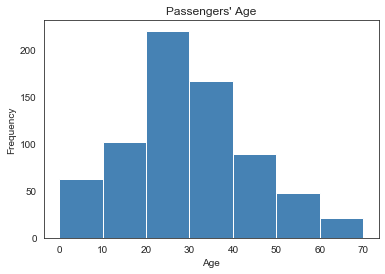

In [33]:
# The histogram below shows the age distribution of passengers by age group (10 years).
plt.hist(titanic_pd['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70], color="Steelblue")
plt.title("Passengers' Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
sns.set_style("white")
plt.show()

What is the number of passengers by gender? <br/>
What are the average ages of men and women?

In [8]:
print(titanic_pd['PassengerId'].groupby(titanic_pd['Sex']).count())
titanic_pd['Age'].groupby(titanic_pd['Sex']).mean()

Sex
female    261
male      453
Name: PassengerId, dtype: int64


Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

Average of 261 Women: Approximately 28 years old <br/>
Average of 453 Men: Approximately 31 years old <br/>
But why so many more men than women? 453/714 ~ 0.63 <br/>
Approximately 63% of passengers in the analyzed sample are male.

In [9]:
# Separating passengers between survivors and non-survivors and checking the numbers
survived = titanic_pd.loc[titanic_pd['Survived']==1]
died = titanic_pd.loc[titanic_pd['Survived']==0]
print(len(survived))
print(len(died))

290
424


Double-Check: <br/>
290 / (290 + 424) = 0.40 <br/>
Ok, it's correct.

What is the average age among survivors?

In [10]:
survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,290.000000,290.0,290.000000,290.000000,290.000000,290.000000,290.000000
mean,457.768966,1.0,1.872414,28.343690,0.493103,0.527586,51.843205
std,250.845515,0.0,0.836617,14.950952,0.731132,0.807147,70.458776
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,260.500000,1.0,1.000000,19.000000,0.000000,0.000000,13.000000
50%,452.000000,1.0,2.000000,28.000000,0.000000,0.000000,26.250000
75%,669.500000,1.0,3.000000,36.000000,1.000000,1.000000,66.200000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


Average age among survivors: approximately 28 years old<br/>

What is the average age among non-survivors?

In [11]:
died.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,424.000000,424.0,424.000000,424.000000,424.000000,424.000000,424.000000
mean,442.299528,0.0,2.485849,30.626179,0.525943,0.365566,22.965456
std,264.739548,0.0,0.743633,14.172110,1.044760,0.878341,31.448825
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,200.750000,0.0,2.000000,21.000000,0.000000,0.000000,7.895800
50%,436.000000,0.0,3.000000,28.000000,0.000000,0.000000,11.887500
75%,683.250000,0.0,3.000000,39.000000,1.000000,0.000000,26.550000
max,891.000000,0.0,3.000000,74.000000,5.000000,6.000000,263.000000


Average age among non-survivors: approximately 31 years old<br/>

What is the proportion of survivors and non-survivors by age group?

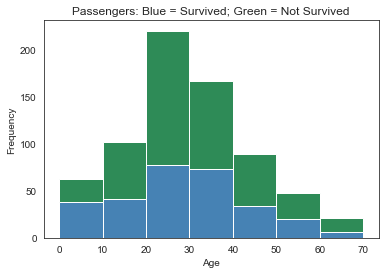

In [12]:
# The histogram below shows the age distribution of passengers by 10-year age groups grouped by
# survivors / non-survivors
x1 = survived['Age']
x2 = died['Age']
plt.hist([x1,x2], bins=[0, 10, 20, 30, 40, 50, 60, 70], stacked=True, color=["Steelblue","Seagreen"])
plt.title("Passengers: Blue = Survived; Green = Not Survived")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [13]:
# Dividing groups of survivors and non-survivors by gender
survived_men = survived.loc[survived['Sex']=="male"]
survived_women = survived.loc[survived['Sex']=="female"]
died_men = died.loc[died['Sex']=="male"]
died_women = died.loc[died['Sex']=="female"]

Is there a significant difference in the proportions of survivors between the genders?

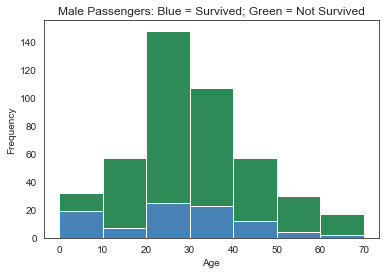

In [14]:
# The histogram below shows the age distribution of male passengers by 10-year age groups grouped by
# survivors / non-survivors
x1 = survived_men['Age']
x2 = died_men['Age']
plt.hist([x1,x2], bins=[0, 10, 20, 30, 40, 50, 60, 70], stacked=True, color=["Steelblue","Seagreen"])
plt.title("Male Passengers: Blue = Survived; Green = Not Survived")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

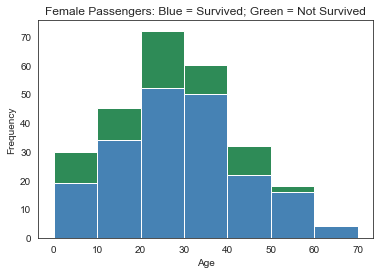

In [15]:
# The histogram below shows the age distribution of female passengers by 10-year age groups grouped by
# survivors / non-survivors
x1 = survived_women['Age']
x2 = died_women['Age']
plt.hist([x1,x2], bins=[0, 10, 20, 30, 40, 50, 60, 70], stacked=True, color=["Steelblue","Seagreen"])
plt.title("Female Passengers: Blue = Survived; Green = Not Survived")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [16]:
# The graphs above give an idea of proportion, but to have an idea in absolute numbers, we would have to add
# the numbers of each subdivision
# To see the number of men and women grouped by survivors and non-survivors:
print("Men that survived: " , len(survived_men))
print("Women that survived: " , len(survived_women))
print("Men that did not survive: " , len(died_men))
print("Women that did not survive: " , len(died_women))


Men that survived:  93
Women that survived:  197
Men that did not survive:  360
Women that did not survive:  64


The proportion of surviving women is 2x higher than that of surviving men.
That is why the average age among survivors is more similar to the average age of women;
and the average age among non-survivors is more similar to the average age of men <br/>
Men account for almost 85% of the dead.

In [17]:
# Average of survivors by gender - To have an idea in relative numbers
titanic_pd['Survived'].groupby(titanic_pd['Sex']).mean()


Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64

Only 20% of men survived <br/>
While 75% of women survived <br/>
Why? <br/>
It is possible that they have given preference to women and children when embarking on lifeboats. <br/>

Among the children, how many survived and how many died? <br/>
And what classes were they from?

In [18]:
print("Children that survived: ",survived['PassengerId'][survived['Age']<=14].count())
print("Children that did not survive: ",died['PassengerId'][died['Age']<=14].count())
print("Survivors grouped by class: ",survived['PassengerId'][survived['Age']<=14].groupby(titanic_pd['Pclass']).count())
print("Non-survivors grouped by class: ",died['PassengerId'][died['Age']<=14].groupby(titanic_pd['Pclass']).count())
print("Survivors grouped by gender: ",survived['PassengerId'][survived['Age']<=14].groupby(titanic_pd['Sex']).count())
print("Non survivors grouped by gender: ",died['PassengerId'][died['Age']<=14].groupby(titanic_pd['Sex']).count())

Children that survived:  45
Children that did not survive:  32
Survivors grouped by class:  Pclass
1     4
2    19
3    22
Name: PassengerId, dtype: int64
Non-survivors grouped by class:  Pclass
1     1
3    31
Name: PassengerId, dtype: int64
Survivors grouped by gender:  Sex
female    24
male      21
Name: PassengerId, dtype: int64
Non survivors grouped by gender:  Sex
female    14
male      18
Name: PassengerId, dtype: int64


It seems that the children have gained priority to board the boats,
we can see that the percentage of children that survived is almost 60%, with the majority of non-survivors
from third class. As the third class was the lowest part of the ship, it is possible that many of these children
didn't even make it to the deck, where the boats were. <br/>
The proportion of survivors by gender among children proves this, 21 boys and 24 girls.
While among adults, 93 men and 197 women. <br/>

Returning to the passengers of the Titanic as a whole: <br/>
Did first class passengers have the highest proportion of survivors?

In [19]:
# Average Survivors by Class
print("Proportion of survivors by class: ",titanic_pd['Survived'].groupby(titanic_pd['Pclass']).mean())
print("Number of passengers by class: ",titanic_pd['Survived'].groupby(titanic_pd['Pclass']).count())

Proportion of survivors by class:  Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64
Number of passengers by class:  Pclass
1    186
2    173
3    355
Name: Survived, dtype: int64


Classes were divided on the Titanic as follows:
On the floors closest to the deck, there was first class
On the lower floors, closer to the engine room, was the third class
And on the middle floors, the second class
As it's depicted below:
![Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/400px-Titanic_cutaway_diagram.png)

As they are closer to the deck, it makes sense for the proportion of survivors among the upper classes to be higher.

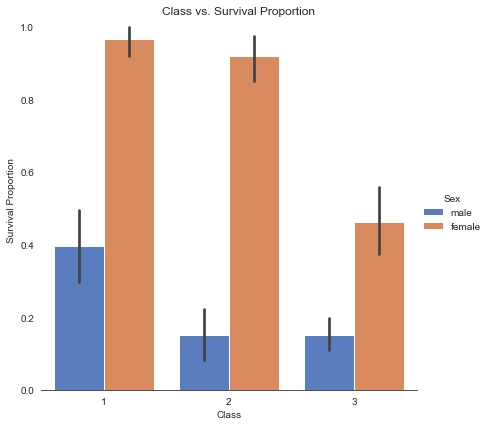

In [20]:
# The histogram below shows the proportion of survivors by class, divided by gender
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=titanic_pd, height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Class")
g.set_ylabels("Survival Proportion")
g.fig.suptitle("Class vs. Survival Proportion")
plt.show()

In [21]:
# Absolute numbers of male survivors by class
survived_men['Survived'].groupby(titanic_pd['Pclass']).sum()

Pclass
1    40
2    15
3    38
Name: Survived, dtype: int64

In [22]:
# Absolute numbers of female survivors by Class
survived_women['Survived'].groupby(titanic_pd['Pclass']).sum()

Pclass
1    82
2    68
3    47
Name: Survived, dtype: int64

We can see in absolute numbers that first class passengers had a better chance of survival, probably because they were closer to the deck. <br/>

What can we say about the boarding cities and their passengers?

In [23]:
# Absolute numbers of passengers by departure city
titanic_pd['PassengerId'].groupby(titanic_pd['Embarked']).count()

Embarked
C    130
Q     28
S    554
Name: PassengerId, dtype: int64

In [24]:
# Average survivor by boarding city
titanic_pd['Survived'].groupby(titanic_pd['Embarked']).mean()

Embarked
C    0.607692
Q    0.285714
S    0.362816
Name: Survived, dtype: float64

In [25]:
# Average ticket price per city of departure
titanic_pd['Fare'].groupby(titanic_pd['Embarked']).mean()

Embarked
C    68.296767
Q    18.265775
S    27.476284
Name: Fare, dtype: float64

With the information above we can get a sense that Southampton is the most populous city;
Queenstown is the poorest city and Cherbourg the richest city. <br/>
Shall we look more deeply? <br/>

In [26]:
# Distribution of passengers by class, in the city of Cherbourg
titanic_pd['PassengerId'][titanic_pd['Embarked']=="C"].groupby(titanic_pd["Pclass"]).count()

Pclass
1    74
2    15
3    41
Name: PassengerId, dtype: int64

Porcentagem de passageiros da primeira classe = 56%

In [27]:
# Distribution of passengers by Class, in the city of Queenstown
titanic_pd['PassengerId'][titanic_pd['Embarked']=="Q"].groupby(titanic_pd["Pclass"]).count()

Pclass
1     2
2     2
3    24
Name: PassengerId, dtype: int64

Porcentagem de passageiros da terceira classe = 85%

In [28]:
# Distribution of passengers by Class, in the city of Southampton
titanic_pd['PassengerId'][titanic_pd['Embarked']=="S"].groupby(titanic_pd["Pclass"]).count()

Pclass
1    108
2    156
3    290
Name: PassengerId, dtype: int64

Percentage of first class passengers = 20% <br/>
With that, we infer that Southampton is the most populous city; Cherbourg the most elite city;
and Queenstown the poorest and / or least populated city.

In [29]:
# Correlate age and ticket price
df = pd.read_csv('D:/Udacity/P2/titanic_data.csv', usecols=[5,9])
df.corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


0.096 means that there is no correlation between the Age and Ticket price variables. <br/>
I figured older people would buy more expensive tickets.
Shall we see in a scatter plot?

Text(0.5, 0.98, 'Age vs. Fare')

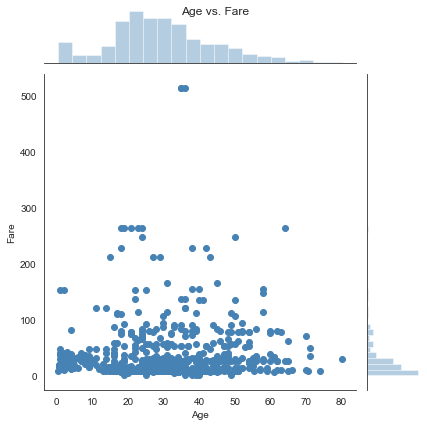

In [30]:
# Plots the scatterplot
g = sns.jointplot(x="Age", y="Fare", data=df, color="Steelblue");
g.fig.suptitle("Age vs. Fare")

We can see that the two variables really have no correlation.

In [31]:
# What was the group of at least 20 people, with the highest proportion of survivors?
print(titanic_pd['Survived'][titanic_pd['Embarked']=="C"][titanic_pd["Sex"]=="female"][titanic_pd["Pclass"]==1][titanic_pd["Age"]!=50].mean())
print(titanic_pd['Survived'][titanic_pd['Embarked']=="C"][titanic_pd["Sex"]=="female"][titanic_pd["Pclass"]==1][titanic_pd["Age"]!=50].count())

1.0
36


All 36 women who embarked in first class in Cherbourg and were different than 50 years old, survived.

In [32]:
# What was the group of at least 20 people, with the lowest proportion of survivors?
print(titanic_pd['Survived'][titanic_pd['Embarked']=="S"][titanic_pd["Sex"]=="male"][titanic_pd["Pclass"]==3][titanic_pd["Age"]>=40].mean())
print(titanic_pd['Survived'][titanic_pd['Embarked']=="S"][titanic_pd["Sex"]=="male"][titanic_pd["Pclass"]==3][titanic_pd["Age"]>=40].count())

0.06896551724137931
29


Dos 29 homens que embarcaram na terceira classe em Southampton, apenas 2 sobreviveram (aproximadamente 7%)

### Limitations

It is known that the ship Titanic sailed with 1316 passengers on board. The database contains only 891 of them. It would be interesting to have the data of all passengers, as well as the data of the crew, which totaled 889 people. In addition, I believe that when buying tickets, people have filled out a form listing their professions. It would be very interesting to compare the professional profile of the people on board. <br/>

The most important category with missing data was age: of 891 passengers, only 714 have the age field filled out. Of these, 18 people are of estimated age. Another category with missing data that would serve for a more curious analysis is the cabin. A map of the ship could be made relating survival to the passenger cabin; that way it might be possible to know which part of the ship flooded first or was most affected. <br/>

In addition, it would be of great value to know the boats with which each passenger was rescued, so it would be possible to know whether they were used with maximum capacity or not to estimate the number of passengers that could be saved if not.
Finally, as a curiosity, if the address of each passenger was known, it could be done a mapping of the areas that suffered the most losses in each city.

### Conclusions
 
At first, the ratio of men to women on the ship made me doubt whether there were any crew members in the data.
As all passengers were in some class, I inferred that they were all passengers and not crew members.
As the ship sailed at the beginning of the 20th century, it is possible that there were men traveling for work without their wives, since they were not inserted in the labor market as they are today. <br/>

Right at the beginning of the analysis, we see that the average age of survivors was very close to the average age of women and the average age of non-survivors was very close to the average age of men, indicating that the gender of passengers had an important role in the survival ratio. Analyzing the histograms that show survival by age group of both genders, we can infer that there was probably an order that favored the entry of women first into the lifeboats. In these same histograms, we see that the proportion of survivors among children is quite large, especially among boys. The proportion of surviving boys and girls is 47% -53%, quite different from the 32% -68% between men and women survivors. Thus, we see that children were probably also privileged to enter the boats.

As expected, first class passengers had the highest proportion of survivors, followed by second class passengers; third-class passengers were the least surviving. As the accident happened around midnight, most of the passengers were in their rooms. And since the boats are on the deck, first class passengers, in theory, would take much less time to get there. Third class passengers, in addition to taking longer to reach the deck, still had to deal with the water coming in from the ship, which flooded the third class rooms first.

We see that we can infer characteristics of cities by the number of passengers and the prices paid for them. The city of Cherbourg, France, had the highest proportion of survivors. Not coincidentally, this had the highest average ticket prices, therefore, the highest proportion of passengers in first class.

Finally, I assumed that older passengers would have more money to buy the most expensive tickets, but as Pearson's r and the scatterplot showed, the assumption was erroneous.

To verify the veracity of the conclusions of this analysis, hypotheses could be formulated and hypothesis tests carried out to confirm or reject them. However, the test results would not be definitive, due to data limitations; these can be significantly different if they include all passengers on board.